In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
plt.style.use(['science', 'notebook', 'grid'])


In [54]:
def calcula_coeficientes(w, wc, n):

    Tn = np.zeros((w.size,))
    # determina os valores dos coeficientes segundo as express�es padronizadas
    Tn[abs(w) < wc] = np.cos(n*np.arccos(w[abs(w) < wc] / wc))
    Tn[abs(w) >= wc] = np.cosh(n*np.arccosh(w[abs(w) >= wc] / wc))
    return Tn


In [55]:
def chebyshev(w, wc, n, gain):
    Tn = calcula_coeficientes(w=w, wc=wc, n=n)
    return np.abs(1/(np.sqrt(1+gain**2 * Tn**2 * (w/wc))))


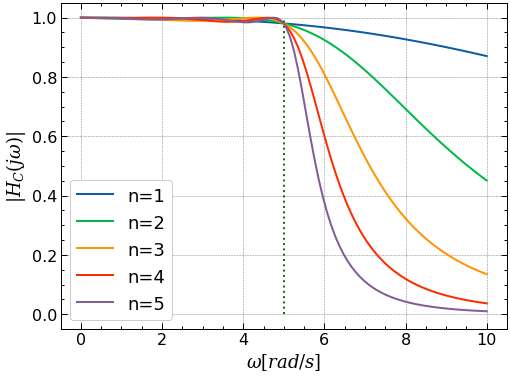

In [56]:
w_c = 5
gain = 0.2
filter_order = [1, 2, 3, 4, 5]

w = np.linspace(0, 10, 100)

for order in filter_order:

    chebyshev_vector = chebyshev(w=w, wc=w_c, n=order, gain=gain)

    plt.plot(w, chebyshev_vector, label=f'n={order}')
    plt.xlabel('$\omega[rad/s]$', fontsize=18)
    plt.ylabel(f'$|H_C(j\omega)|$', fontsize=18)
    plt.legend(loc='lower left', fontsize=18)

plt.vlines(x=5, ymin=0, ymax=1, colors='green', ls=':', lw=2)
plt.show
plt.savefig('(a).png')


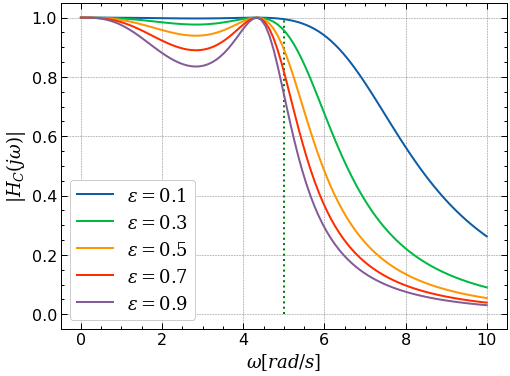

In [57]:
w_c = 5
gain = [0.1, 0.3, 0.5, 0.7, 0.9]
order = 3

w = np.linspace(0, 10, 100)

for e in gain:

    chebyshev_vector = chebyshev(w=w, wc=w_c, n=order, gain=e)

    plt.plot(w, chebyshev_vector, label=f'$\epsilon={e}$')
    plt.xlabel('$\omega[rad/s]$', fontsize=18)
    plt.ylabel(f'$|H_C(j\omega)|$', fontsize=18)
    plt.legend(loc='lower left', fontsize=18)

plt.vlines(x=5, ymin=0, ymax=1, colors='green', ls=':', lw=2)
plt.show
plt.savefig('(b).png')


In [58]:
def butterworth(w, wc, n):
    return np.abs(
        1/np.sqrt(
            1 + (w/wc)**(2*n)
        )
    )


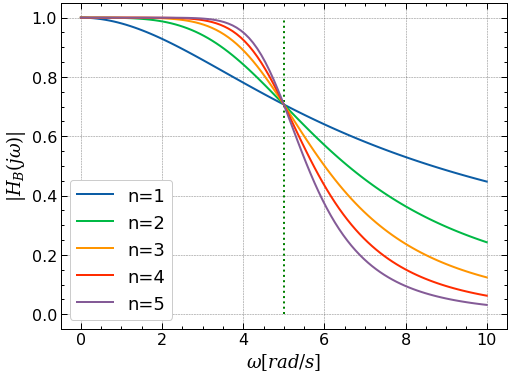

In [59]:
w_c = 5
gain = 0.2
filter_order = [1, 2, 3, 4, 5]

w = np.linspace(0, 10, 100)

for order in filter_order:

    butterworth_vector = butterworth(w=w, wc=w_c, n=order)

    plt.plot(w, butterworth_vector, label=f'n={order}')
    plt.xlabel('$\omega[rad/s]$', fontsize=18)
    plt.ylabel(f'$|H_B(j\omega)|$', fontsize=18)
    plt.legend(loc='lower left', fontsize=18)

plt.vlines(x=5, ymin=0, ymax=1, colors='green', ls=':', lw=2)
plt.show
plt.savefig('(c).png')


In [60]:
def Xjw(w, wc):
    return np.abs(
        2*np.pi*(np.sin((w*np.pi)/(wc)))/(w*np.pi)
    )


In [61]:
def Xjw2(w, wc):
    tau = (2*np.pi)/wc
    return np.abs(
        tau*((np.sin((w*tau)/2))/((w*tau)/2))
    )


<ipython-input-60-f36ca55b614a>:3: RuntimeWarning: invalid value encountered in double_scalars
  2*np.pi*(np.sin((w*np.pi)/(wc)))/(w*np.pi)


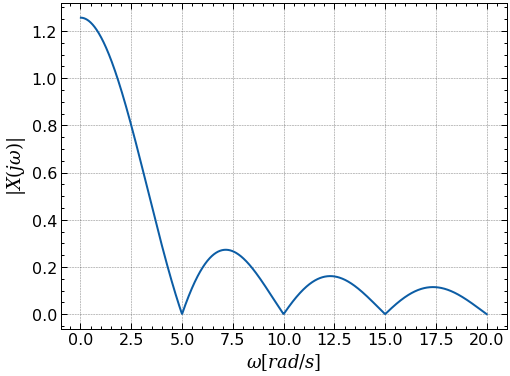

In [62]:
w_c = 5
w = np.linspace(0, 20, 1000)
Xjw_vector = []
for f in w:
    Xjw_vector.append(Xjw(w=f, wc=w_c))

plt.plot(w, Xjw_vector)
plt.xlabel('$\omega[rad/s]$', fontsize=18)
plt.ylabel(f'$|X(j\omega)|$', fontsize=18)

plt.savefig('(d).png')


In [63]:
def Hideal(w, wc):
    if np.abs(w) <= wc:
        return 1
    else:
        return 0


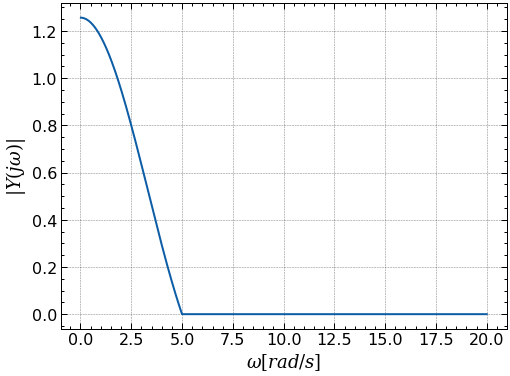

In [64]:
Hideal_vector = []
for f in w:
    Hideal_vector.append(Hideal(w=f, wc=w_c))

Yjw_vector = np.abs(np.multiply(Hideal_vector, Xjw_vector))

plt.plot(w, Yjw_vector)
plt.xlabel('$\omega[rad/s]$', fontsize=18)
plt.ylabel(f'$|Y(j\omega)|$', fontsize=18)


plt.savefig('(e2).png')


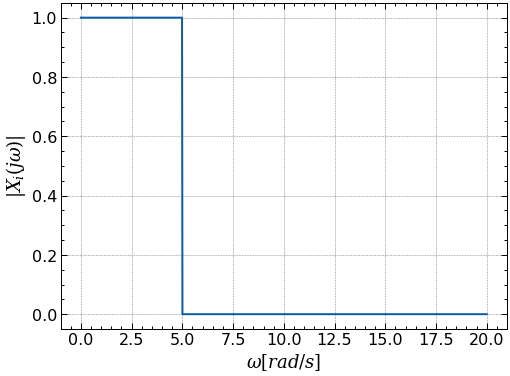

In [65]:
w_c = 5
w = np.linspace(0, 20, 1000)
Hideal_vector2 = []
for f in w:
    Hideal_vector2.append(Hideal(w=f, wc=w_c))

plt.plot(w, Hideal_vector2)
plt.xlabel('$\omega[rad/s]$', fontsize=18)
plt.ylabel(f'$|X_i(j\omega)|$', fontsize=18)

plt.savefig('(e1).png')


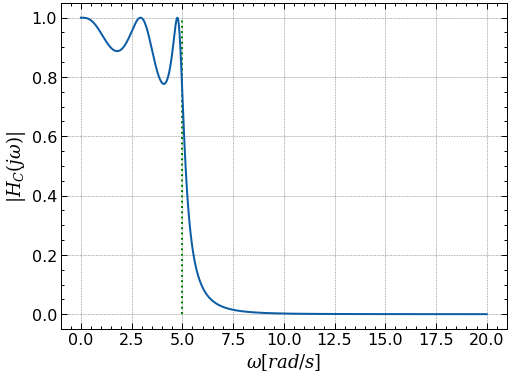

In [66]:
w_c = 5
gain = 0.9
filter_order = 3

w = np.linspace(0, 20, 1000)


chebyshev_vector = chebyshev(w=w, wc=w_c, n=order, gain=gain)

plt.plot(w, chebyshev_vector)
plt.xlabel('$\omega[rad/s]$', fontsize=18)
plt.ylabel(f'$|H_C(j\omega)|$', fontsize=18)

plt.vlines(x=5, ymin=0, ymax=1, colors='green', ls=':', lw=2)
plt.savefig('(f1).png')


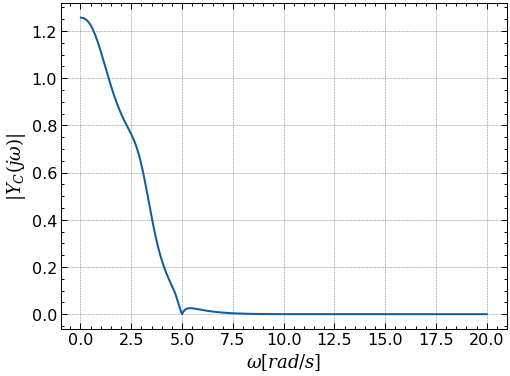

In [67]:
YCjw_vector = np.abs(np.multiply(chebyshev_vector, Xjw_vector))

plt.plot(w, YCjw_vector)
plt.xlabel('$\omega[rad/s]$', fontsize=18)
plt.ylabel(f'$|Y_C(j\omega)|$', fontsize=18)
plt.savefig('(f2).png')


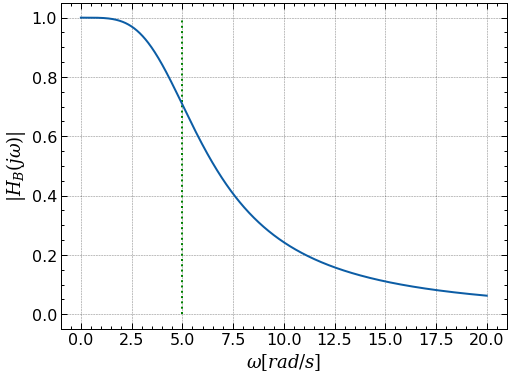

In [68]:
w_c = 5
filter_order = 2

w = np.linspace(0, 20, 1000)


butterworth_vector = butterworth(w=w, wc=w_c, n=filter_order)

plt.plot(w, butterworth_vector)
plt.xlabel('$\omega[rad/s]$', fontsize=18)
plt.ylabel(f'$|H_B(j\omega)|$', fontsize=18)

plt.vlines(x=5, ymin=0, ymax=1, colors='green', ls=':', lw=2)
plt.savefig('(g1).png')


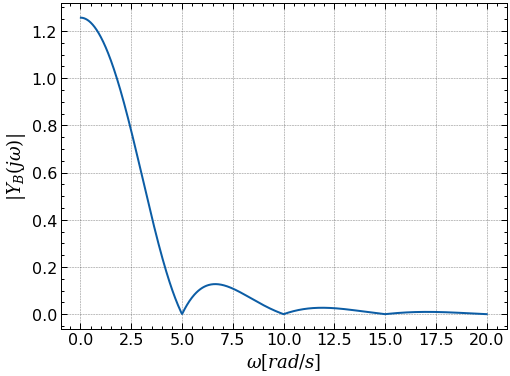

In [69]:
YBjw_vector = np.abs(np.multiply(butterworth_vector, Xjw_vector))

plt.plot(w, YBjw_vector)
plt.xlabel('$\omega[rad/s]$', fontsize=18)
plt.ylabel(f'$|Y_B(j\omega)|$', fontsize=18)
plt.savefig('(g2).png')

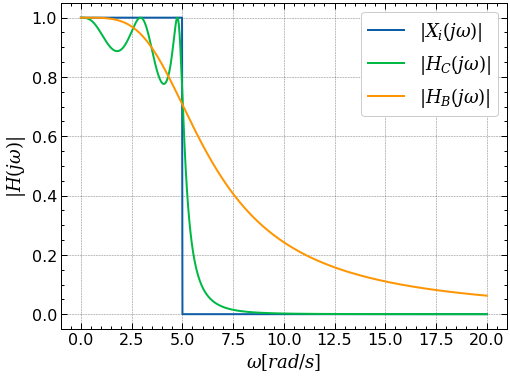

In [70]:
w_c = 5
w = np.linspace(0, 20, 1000)
Hideal_vector2 = []
for f in w:
    Hideal_vector2.append(Hideal(w=f, wc=w_c))

plt.plot(w, Hideal_vector2, label="$|X_i(j\omega)|$")

gain = 0.9
filter_order = 3

chebyshev_vector = chebyshev(w=w, wc=w_c, n=order, gain=gain)
plt.plot(w, chebyshev_vector, label="$|H_C(j\omega)|$")

filter_order = 2

butterworth_vector = butterworth(w=w, wc=w_c, n=filter_order)
plt.plot(w, butterworth_vector, label="$|H_B(j\omega)|$")

plt.xlabel('$\omega[rad/s]$', fontsize=18)
plt.ylabel(f'$|H(j\omega)|$', fontsize=18)
plt.legend(loc='upper right', fontsize=18)

plt.savefig('(h1).png')


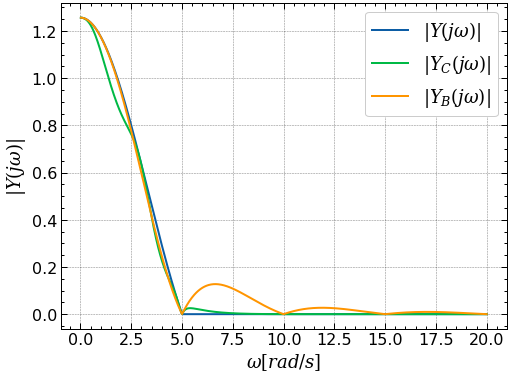

In [71]:
Yjw_vector = np.abs(np.multiply(Hideal_vector, Xjw_vector))
plt.plot(w, Yjw_vector, label = f'$|Y(j\omega)|$')

YCjw_vector = np.abs(np.multiply(chebyshev_vector, Xjw_vector))
plt.plot(w, YCjw_vector, label = f'$|Y_C(j\omega)|$')

YBjw_vector = np.abs(np.multiply(butterworth_vector, Xjw_vector))
plt.plot(w, YBjw_vector, label = f'$|Y_B(j\omega)|$')

plt.xlabel('$\omega[rad/s]$', fontsize=18)
plt.ylabel(f'$|Y(j\omega)|$', fontsize=18)
plt.legend(loc='upper right', fontsize=18)

plt.savefig('(h2).png')
